# Cross-correlation between two stations

This Notebook correlates time-windows of a seismic stream from two stations.

- (instrument response)
- slicing
- from fourie to time domain
- correlation of stations not days?
- saving

In [1]:
import numpy as np
import pandas as pd
import obspy
import obspy.signal.filter
from obspy import UTCDateTime
from pnwstore.mseed import WaveformClient
client = WaveformClient()
import datetime
import scipy
from scipy import signal
import glob
import sys
import os
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib

sys.path.append('/home/koepflma/project1/Mt-St-Helens')
from functions import *

In [22]:
# read data to stream from station 1
net = 'UW'
sta = 'EDM'
cha = 'EHZ'
year = 2018
jday = 90
time = UTCDateTime(year=year, julday=jday, hour=12)
time_shift = 60*60 # seconds
try:
    st_1 = read_stream(net, sta, cha, year, jday)
except:
    print('Problem during reading mseed to stream: {}-{}'.format(year,day))

st_1 = st_1.slice(time, time + time_shift)
st_1.detrend('linear')
st_1.taper(0.1)
    
st_1

1 Trace(s) in Stream:
UW.EDM..EHZ | 2018-03-31T12:00:00.000018Z - 2018-03-31T13:00:00.000018Z | 100.0 Hz, 360001 samples

In [23]:
# read data to stream from station 2
net = 'UW'
sta = 'SHW'
#sta = 'EDM'
cha = 'EHZ'
try:
    st_2 = read_stream(net, sta, cha, year, jday)
except:
    print('Problem during reading mseed to stream: {}-{}'.format(year,day))

st_2 = st_2.slice(time, time + time_shift)
st_2.detrend('linear')
st_2.taper(0.1)
    
st_2

1 Trace(s) in Stream:
UW.SHW..EHZ | 2018-03-31T12:00:00.000018Z - 2018-03-31T13:00:00.000018Z | 100.0 Hz, 360001 samples

In [24]:
# # slice trace in shorter time-windows
# st_slice = st
# # pre-ptocessing
# st_slice.detrend('linear')
# st_slice.taper(0.05)

In [25]:
# cross-correlation
corr = signal.correlate(st_1, st_2)
corr /= np.max(corr)
lags = signal.correlation_lags(len(st_1), len(st_2))

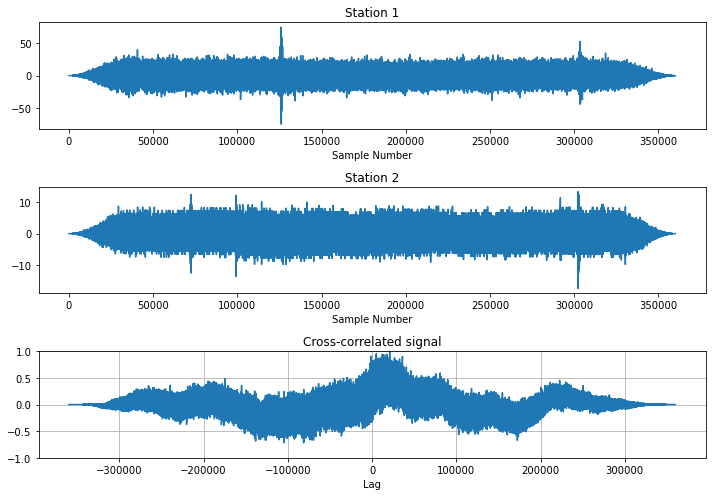

In [26]:
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(10, 7))
ax_orig.plot(st_1[0].data)
ax_orig.set_title('Station 1')
ax_orig.set_xlabel('Sample Number')
ax_noise.plot(st_2[0].data)
ax_noise.set_title('Station 2')
ax_noise.set_xlabel('Sample Number')
ax_corr.plot(np.arange(-len(corr[0])/2,len(corr[0])/2), corr[0])
ax_corr.set_ylim(-1,1)
ax_corr.grid()
ax_corr.set_title('Cross-correlated signal')
ax_corr.set_xlabel('Lag')
fig.tight_layout()
plt.show()

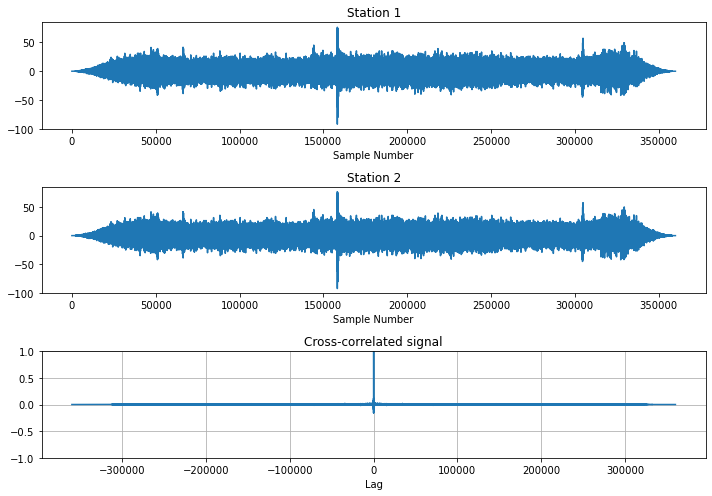

In [5]:
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(10, 7))
ax_orig.plot(st_1[0].data)
ax_orig.set_title('Station 1')
ax_orig.set_xlabel('Sample Number')
ax_noise.plot(st_2[0].data)
ax_noise.set_title('Station 2')
ax_noise.set_xlabel('Sample Number')
ax_corr.plot(np.arange(-len(corr[0])/2,len(corr[0])/2), corr[0])
ax_corr.set_ylim(-1,1)
ax_corr.grid()
ax_corr.set_title('Cross-correlated signal')
ax_corr.set_xlabel('Lag')
fig.tight_layout()
plt.show()

In [71]:
lags

array([0])